# importing liberaries and Dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df=pd.read_csv(r"C:\Users\dell\Downloads\Compressed\archive_3\netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.shape

(8790, 10)

# Describetion and inforrmaton the Dataset

In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Check Nulls and Dublication (Data Cleaning)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['title'].value_counts()


9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [12]:
df = df.drop_duplicates(subset=['title'])


In [13]:
df['title'].value_counts()


Dick Johnson Is Dead                 1
SGT. Will Gardner                    1
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
                                    ..
Mercy Black                          1
The Trap                             1
Pinky Memsaab                        1
Love O2O                             1
YOM                                  1
Name: title, Length: 8787, dtype: int64

In [14]:
#un necessary column
df.drop(['show_id'], axis=1, inplace=True)
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

Most productions consist of one season

# Data anlaysis

In [15]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
#how much each of movie and TV show
df['type'].value_counts()

Movie      6124
TV Show    2663
Name: type, dtype: int64

In [17]:
#the most 10 years that have large amount of works
(df['release_year'].value_counts()).nlargest(10)

2018    1144
2017    1030
2019    1029
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

In [18]:
#the most 10 years that have few amount of works
(df['release_year'].value_counts()).nsmallest(10)

1966    1
1959    1
1925    1
1947    1
1961    1
1970    2
1963    2
1969    2
1956    2
1954    2
Name: release_year, dtype: int64

In [19]:
#top ten director that have works on netfilx
(df['director'].value_counts()).nlargest(10)

Not Given                 2587
Rajiv Chilaka               20
Raúl Campos, Jan Suter      18
Alastair Fothergill         18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Name: director, dtype: int64

In [20]:
#the lowest ten director that have works on netfilx
(df['director'].value_counts()).nsmallest(10)

Dave Green                       1
Fisher Stevens                   1
Ben Ryder                        1
Julian Jarrold                   1
Benoît Jacquot                   1
Agasyah Karim, Khalid Kashogi    1
Rajiv Chilaka, Binayak Das       1
Aatmaram Dharne                  1
Doug Lefler                      1
Mark O'Connor                    1
Name: director, dtype: int64

In [21]:
df['listed_in'].mode()[0]

'Dramas, International Movies'

In [22]:
#the most and the lowest countries that have works
df['country'].value_counts()

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [23]:
#turn a type of date from object to datetime data type
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added'].dtype

dtype('<M8[ns]')

In [24]:
#the most month that movies or series added to neflix
df['date_added'].dt.month_name().mode()[0]

'July'

In [25]:
country = df.groupby(['country','type'])['type'].count().sort_values().reset_index(name='count')
country

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,349
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,975


# data visulizaion

<AxesSubplot:xlabel='type', ylabel='count'>

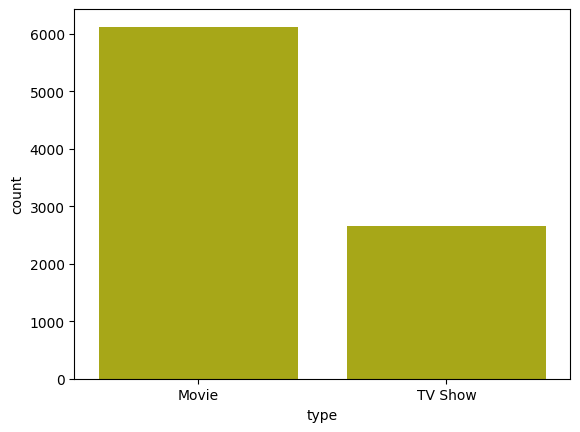

In [61]:
sns.countplot(x='type', data=df,color="y")

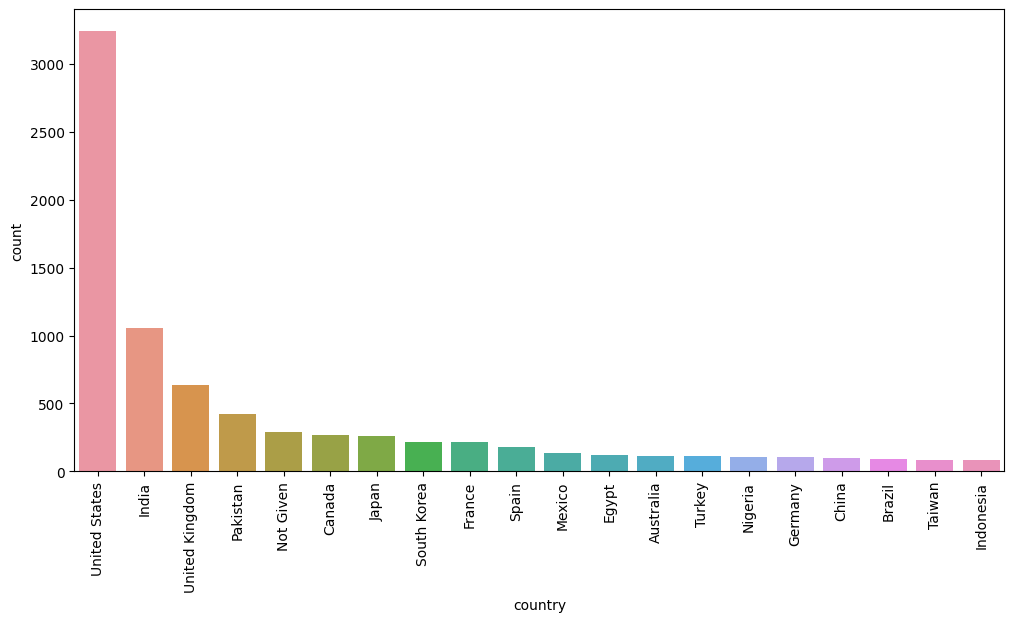

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [42]:
top10_director = df['director'].value_counts().drop("Not Given").head(10)
fig = px.bar(top10_director , x=top10_director.index , y=top10_director.values,color=top10_director,title='     Most productive directors', )
fig.show()

In [41]:
top10_rating = df['listed_in'].value_counts().head(10)
fig = px.bar(top10_rating , x=top10_rating.index , y=top10_rating.values,color=top10_rating,title='Top 10 categories of shows')
fig.show()

In [44]:
px.histogram(data_frame=df,x='country',color='country',title='The amount of productions for countries')

In [54]:
top10_years = df['release_year'].value_counts().head(10)
fig = px.bar(top10_years , x=top10_years.index , y=top10_years.values,color=top10_years,title='Top 10 years in which productions took place')
fig.show()

In [56]:
top10_month = df['date_added'].dt.month_name().value_counts().head(10)
fig = px.bar(top10_month , x=top10_month.index , y=top10_month.values,color=top10_month,title='Top 10 Months in which productions took place')
fig.show()